## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
traffic = pd.read_csv('../input/traffic.csv')

traffic.head()

,Geographic Address,CO Address,LCC Address,Transponder Address,Device Address,Date,Time,Number of Lanes,Flow(Category 1),Flow(Category 2),...,Occupancy(Lane 5),Occupancy(Lane 6),Occupancy(Lane 7),Headway(Lane 1),Headway(Lane 2),Headway(Lane 3),Headway(Lane 4),Headway(Lane 5),Headway(Lane 6),Headway(Lane 7)
0,M1/4771B,12,7,116,322,14/02/17,00:00,3,1,0,...,-1,-1,-1,-1,-1,0,-1,-1,-1,-1
1,M1/4771B,12,7,116,322,14/02/17,00:01,3,5,1,...,-1,-1,-1,103,91,0,-1,-1,-1,-1
2,M1/4771B,12,7,116,322,14/02/17,00:02,3,1,0,...,-1,-1,-1,0,102,0,-1,-1,-1,-1
3,M1/4771B,12,7,116,322,14/02/17,00:03,3,2,0,...,-1,-1,-1,178,136,0,-1,-1,-1,-1
4,M1/4771B,12,7,116,322,14/02/17,00:04,3,4,0,...,-1,-1,-1,130,194,0,-1,-1,-1,-1


In [3]:
traffic.describe()

,CO Address,LCC Address,Transponder Address,Device Address,Number of Lanes,Flow(Category 1),Flow(Category 2),Flow(Category 3),Flow(Category 4),Speed(Lane 1),...,Occupancy(Lane 5),Occupancy(Lane 6),Occupancy(Lane 7),Headway(Lane 1),Headway(Lane 2),Headway(Lane 3),Headway(Lane 4),Headway(Lane 5),Headway(Lane 6),Headway(Lane 7)
count,10080.0,10080.0,10080.0,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,...,10080.0,10080.0,10080.0,10080.000000,10080.000000,10080.00000,10080.0,10080.0,10080.0,10080.0
mean,12.0,7.0,116.0,297.285714,2.857143,23.153571,2.313889,1.479167,2.209623,91.175595,...,-1.0,-1.0,-1.0,68.923115,47.598313,33.43869,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,39.479671,0.349944,21.458355,2.934055,1.790651,1.875531,20.348568,...,0.0,0.0,0.0,51.889766,54.030587,46.50213,0.0,0.0,0.0,0.0
min,12.0,7.0,116.0,202.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.0,-1.0
25%,12.0,7.0,116.0,302.000000,3.000000,4.000000,0.000000,0.000000,1.000000,89.000000,...,-1.0,-1.0,-1.0,37.000000,18.000000,0.00000,-1.0,-1.0,-1.0,-1.0
50%,12.0,7.0,116.0,312.000000,3.000000,18.000000,1.000000,1.000000,2.000000,94.000000,...,-1.0,-1.0,-1.0,51.000000,29.000000,18.00000,-1.0,-1.0,-1.0,-1.0
75%,12.0,7.0,116.0,320.000000,3.000000,38.000000,3.000000,2.000000,3.000000,100.000000,...,-1.0,-1.0,-1.0,95.000000,60.000000,50.00000,-1.0,-1.0,-1.0,-1.0
max,12.0,7.0,116.0,322.000000,3.000000,99.000000,22.000000,12.000000,11.000000,151.000000,...,-1.0,-1.0,-1.0,253.000000,253.000000,254.00000,-1.0,-1.0,-1.0,-1.0


In [4]:
traffic.shape

(10080, 40)

In [5]:
traffic = traffic[0:1000]
traffic.shape

(1000, 40)

In [6]:
traffic.describe()

,CO Address,LCC Address,Transponder Address,Device Address,Number of Lanes,Flow(Category 1),Flow(Category 2),Flow(Category 3),Flow(Category 4),Speed(Lane 1),...,Occupancy(Lane 5),Occupancy(Lane 6),Occupancy(Lane 7),Headway(Lane 1),Headway(Lane 2),Headway(Lane 3),Headway(Lane 4),Headway(Lane 5),Headway(Lane 6),Headway(Lane 7)
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0
mean,12.0,7.0,116.0,322.0,3.0,23.880000,2.210000,1.625000,2.553000,98.393000,...,-1.0,-1.0,-1.0,70.632000,37.573000,44.528000,-1.0,-1.0,-1.0,-1.0
std,0.0,0.0,0.0,0.0,0.0,18.498751,1.924995,1.469876,1.749929,13.000676,...,0.0,0.0,0.0,51.579463,42.780192,48.482138,0.0,0.0,0.0,0.0
min,12.0,7.0,116.0,322.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
25%,12.0,7.0,116.0,322.0,3.0,3.000000,1.000000,0.000000,1.000000,96.000000,...,-1.0,-1.0,-1.0,42.000000,21.000000,0.000000,-1.0,-1.0,-1.0,-1.0
50%,12.0,7.0,116.0,322.0,3.0,27.000000,2.000000,1.000000,2.000000,100.000000,...,-1.0,-1.0,-1.0,50.000000,29.000000,35.000000,-1.0,-1.0,-1.0,-1.0
75%,12.0,7.0,116.0,322.0,3.0,36.000000,3.000000,3.000000,4.000000,103.000000,...,-1.0,-1.0,-1.0,87.000000,39.000000,67.000000,-1.0,-1.0,-1.0,-1.0
max,12.0,7.0,116.0,322.0,3.0,92.000000,9.000000,8.000000,10.000000,134.000000,...,-1.0,-1.0,-1.0,252.000000,246.000000,251.000000,-1.0,-1.0,-1.0,-1.0


In [7]:
traffic = traffic.drop(["Geographic Address","CO Address","LCC Address","Transponder Address","Device Address","Flow(Category 1)","Flow(Category 2)","Flow(Category 3)","Flow(Category 4)","Occupancy(Lane 1)","Occupancy(Lane 2)","Occupancy(Lane 3)","Occupancy(Lane 4)","Occupancy(Lane 5)","Occupancy(Lane 6)","Occupancy(Lane 7)","Headway(Lane 1)","Headway(Lane 2)","Headway(Lane 3)","Headway(Lane 4)","Headway(Lane 5)","Headway(Lane 6)","Headway(Lane 7)","Number of Lanes"], axis=1)

In [8]:
traffic.shape

(1000, 16)

In [9]:
traffic.head()

,Date,Time,Speed(Lane 1),Speed(Lane 2),Speed(Lane 3),Speed(Lane 4),Speed(Lane 5),Speed(Lane 6),Speed(Lane 7),Flow(Lane 1),Flow(Lane 2),Flow(Lane 3),Flow(Lane 4),Flow(Lane 5),Flow(Lane 6),Flow(Lane 7)
0,14/02/17,00:00,94,137,0,-1,-1,-1,-1,1,1,0,-1,-1,-1,-1
1,14/02/17,00:01,96,125,0,-1,-1,-1,-1,4,4,0,-1,-1,-1,-1
2,14/02/17,00:02,0,162,0,-1,-1,-1,-1,0,1,0,-1,-1,-1,-1
3,14/02/17,00:03,97,102,0,-1,-1,-1,-1,3,2,0,-1,-1,-1,-1
4,14/02/17,00:04,94,137,0,-1,-1,-1,-1,5,3,0,-1,-1,-1,-1


In [10]:
weather = pd.read_csv('../input/weather.csv')

weather.head()

,ObservationTime,ReceiveTime,ESSPollingInterval,SampleInterval,BureauLatency,PresentWeatherWmo,PresentWeatherWmo Quality,AirTemp,AirTemp Quality,DewTemp,...,HardwareStatus-RemoteSurfaceSensor Quality,RelayState,RelayState Quality,BatteryVoltage,BatteryVoltage Quality,HardwareStatus-ESS,HardwareStatus-ESS Quality,VisibilitySensorStatus,VisibilitySensorStatus Quality,Unnamed: 203
0,14/02/2017 11:40:00,14/02/2017 11:47:54,10,10,0,NothingObstructingHorizontalVisibility,Good,7.6,Good,6.5,...,NaN,NaN,NaN,NaN,NaN,AllOk,NotPerformed,VisibilityOkHardwareOk,NotPerformed,NaN
1,14/02/2017 11:30:00,14/02/2017 11:37:43,10,10,0,NothingObstructingHorizontalVisibility,Good,7.8,Good,6.5,...,NaN,NaN,NaN,NaN,NaN,AllOk,NotPerformed,VisibilityOkHardwareOk,NotPerformed,NaN
2,14/02/2017 11:20:00,14/02/2017 11:28:03,10,10,0,NothingObstructingHorizontalVisibility,Good,8.3,Good,6.7,...,NaN,NaN,NaN,NaN,NaN,AllOk,NotPerformed,VisibilityOkHardwareOk,NotPerformed,NaN
3,14/02/2017 11:10:00,14/02/2017 11:28:00,10,10,0,NothingObstructingHorizontalVisibility,Good,8.8,Good,6.9,...,NaN,NaN,NaN,NaN,NaN,AllOk,NotPerformed,VisibilityOkHardwareOk,NotPerformed,NaN
4,14/02/2017 11:00:00,14/02/2017 11:07:46,10,10,0,NothingObstructingHorizontalVisibility,Good,8.9,Good,6.9,...,NaN,NaN,NaN,NaN,NaN,AllOk,NotPerformed,VisibilityOkHardwareOk,NotPerformed,NaN


In [11]:
weather.shape

(1009, 204)

In [12]:
weather = weather[0:1000]
weather.shape

(1000, 204)

In [13]:
weather = weather.drop(["ReceiveTime", "ESSPollingInterval","SampleInterval","BureauLatency","PresentWeatherWmo","PresentWeatherWmo Quality","AirTemp Quality","DewTemp","DewTemp Quality","RelativeHumidity Quality","AverageWindSpeed Quality","WindDirection","WindDirection Quality","WindGustSpeed","WindGustSpeed Quality","WindGustDirection","WindGustDirection Quality","RainState","RainState Quality","Visibility","Visibility Quality","RainIntensity","RainIntensity Quality","TotalPrecipitation","TotalPrecipitation Quality","Pressure","Pressure Quality","SnowDepth","SnowDepth Quality","AtmosphericPressureAtSeaLevel","AtmosphericPressureAtSeaLevel Quality","PrecipitationTotalLastHour","PrecipitationTotalLastHour Quality","RainOnOff","RainOnOff Quality","SolarRadiation","SolarRadiation Quality","RoadSurfaceTemp1","RoadSurfaceTemp1 Quality","RoadSurfaceState1","RoadSurfaceState1 Quality","LevelOfGrip1","LevelOfGrip1 Quality","FreezeTemp1","FreezeTemp1 Quality","CloudState1","CloudState1 Quality","GroundTemp1","GroundTemp1 Quality","DepthTemp1","DepthTemp1 Quality","WaterThickness1","WaterThickness1 Quality","AlarmStatus1","AlarmStatus1 Quality","WaterLayer1","WaterLayer1 Quality","IceLayer1","IceLayer1 Quality","SnowLayer1","SnowLayer1 Quality","ChemicalAmount1","ChemicalAmount1 Quality","DeicingConcentration1","DeicingConcentration1 Quality","WetMinutes1","WetMinutes1 Quality","Conductivity1","Conductivity1 Quality","SurfaceSignal1","SurfaceSignal1 Quality","BlackIceFrequency1","BlackIceFrequency1 Quality","LiquidusFreezeingTemperature1","LiquidusFreezeingTemperature1 Quality","RoadSurfaceTemp2","RoadSurfaceTemp2 Quality","RoadSurfaceState2","RoadSurfaceState2 Quality","LevelOfGrip2","LevelOfGrip2 Quality","FreezeTemp2","FreezeTemp2 Quality","CloudState2","CloudState2 Quality","GroundTemp2","GroundTemp2 Quality","DepthTemp2","DepthTemp2 Quality","WaterThickness2","WaterThickness2 Quality","AlarmStatus2","AlarmStatus2 Quality","WaterLayer2","WaterLayer2 Quality","IceLayer2","IceLayer2 Quality","SnowLayer2","SnowLayer2 Quality","ChemicalAmount2","ChemicalAmount2 Quality","DeicingConcentration2","DeicingConcentration2 Quality","WetMinutes2","WetMinutes2 Quality","Conductivity2","Conductivity2 Quality","SurfaceSignal2","SurfaceSignal2 Quality","BlackIceFrequency2","BlackIceFrequency2 Quality","LiquidusFreezeingTemperature2","LiquidusFreezeingTemperature2 Quality","RoadSurfaceTemp3","RoadSurfaceTemp3 Quality","RoadSurfaceState3","RoadSurfaceState3 Quality","LevelOfGrip3","LevelOfGrip3 Quality","FreezeTemp3","FreezeTemp3 Quality","CloudState3","CloudState3 Quality","GroundTemp3","GroundTemp3 Quality","DepthTemp3","DepthTemp3 Quality","WaterThickness3","WaterThickness3 Quality","AlarmStatus3","AlarmStatus3 Quality","WaterLayer3","WaterLayer3 Quality","IceLayer3","IceLayer3 Quality","SnowLayer3","SnowLayer3 Quality","ChemicalAmount3","ChemicalAmount3 Quality","DeicingConcentration3","DeicingConcentration3 Quality","WetMinutes3","WetMinutes3 Quality","Conductivity3","Conductivity3 Quality","SurfaceSignal3","SurfaceSignal3 Quality","BlackIceFrequency3","BlackIceFrequency3 Quality","LiquidusFreezeingTemperature3","LiquidusFreezeingTemperature3 Quality","RoadSurfaceTemp4","RoadSurfaceTemp4 Quality","RoadSurfaceState4","RoadSurfaceState4 Quality","LevelOfGrip4","LevelOfGrip4 Quality","FreezeTemp4","FreezeTemp4 Quality","CloudState4","CloudState4 Quality","GroundTemp4","GroundTemp4 Quality","DepthTemp4","DepthTemp4 Quality","WaterThickness4","WaterThickness4 Quality","AlarmStatus4","AlarmStatus4 Quality","WaterLayer4","WaterLayer4 Quality","IceLayer4","IceLayer4 Quality","SnowLayer4","SnowLayer4 Quality","ChemicalAmount4","ChemicalAmount4 Quality","DeicingConcentration4","DeicingConcentration4 Quality","WetMinutes4","WetMinutes4 Quality","Conductivity4","Conductivity4 Quality","SurfaceSignal4","SurfaceSignal4 Quality","BlackIceFrequency4","BlackIceFrequency4 Quality","LiquidusFreezeingTemperature4","LiquidusFreezeingTemperature4 Quality","HardwareStatus-RemoteSurfaceSensor","HardwareStatus-RemoteSurfaceSensor Quality","RelayState","RelayState Quality","BatteryVoltage","BatteryVoltage Quality","HardwareStatus-ESS","HardwareStatus-ESS Quality","VisibilitySensorStatus","VisibilitySensorStatus Quality", "Unnamed: 203"], axis=1)

In [14]:
weather.shape

(1000, 4)

In [15]:
weather.head()

,ObservationTime,AirTemp,RelativeHumidity,AverageWindSpeed
0,14/02/2017 11:40:00,7.6,93,13.32
1,14/02/2017 11:30:00,7.8,92,14.76
2,14/02/2017 11:20:00,8.3,89,13.68
3,14/02/2017 11:10:00,8.8,88,12.60
4,14/02/2017 11:00:00,8.9,87,11.52


In [16]:
AirTemp = weather['AirTemp']
RelativeHumidity = weather['RelativeHumidity']
AverageWindSpeed = weather['AverageWindSpeed']

In [17]:
data = pd.concat([traffic, AirTemp, RelativeHumidity, AverageWindSpeed], axis=1)
data.head()

,Date,Time,Speed(Lane 1),Speed(Lane 2),Speed(Lane 3),Speed(Lane 4),Speed(Lane 5),Speed(Lane 6),Speed(Lane 7),Flow(Lane 1),Flow(Lane 2),Flow(Lane 3),Flow(Lane 4),Flow(Lane 5),Flow(Lane 6),Flow(Lane 7),AirTemp,RelativeHumidity,AverageWindSpeed
0,14/02/17,00:00,94,137,0,-1,-1,-1,-1,1,1,0,-1,-1,-1,-1,7.6,93,13.32
1,14/02/17,00:01,96,125,0,-1,-1,-1,-1,4,4,0,-1,-1,-1,-1,7.8,92,14.76
2,14/02/17,00:02,0,162,0,-1,-1,-1,-1,0,1,0,-1,-1,-1,-1,8.3,89,13.68
3,14/02/17,00:03,97,102,0,-1,-1,-1,-1,3,2,0,-1,-1,-1,-1,8.8,88,12.60
4,14/02/17,00:04,94,137,0,-1,-1,-1,-1,5,3,0,-1,-1,-1,-1,8.9,87,11.52


In [18]:
data.shape

(1000, 19)

In [19]:
data.describe()

,Speed(Lane 1),Speed(Lane 2),Speed(Lane 3),Speed(Lane 4),Speed(Lane 5),Speed(Lane 6),Speed(Lane 7),Flow(Lane 1),Flow(Lane 2),Flow(Lane 3),Flow(Lane 4),Flow(Lane 5),Flow(Lane 6),Flow(Lane 7),AirTemp,RelativeHumidity,AverageWindSpeed
count,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.000000
mean,98.393000,103.736000,89.029000,-1.0,-1.0,-1.0,-1.0,9.830000,13.012000,7.426000,-1.0,-1.0,-1.0,-1.0,2.529500,89.934000,10.722240
std,13.000676,38.668742,60.019951,0.0,0.0,0.0,0.0,5.011608,9.260757,8.144867,0.0,0.0,0.0,0.0,2.007982,5.802699,4.761649
min,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,-1.0,0.000000,72.000000,0.000000
25%,96.000000,112.000000,0.000000,-1.0,-1.0,-1.0,-1.0,5.000000,2.000000,0.000000,-1.0,-1.0,-1.0,-1.0,1.100000,86.000000,7.200000
50%,100.000000,116.000000,125.000000,-1.0,-1.0,-1.0,-1.0,11.000000,15.000000,5.000000,-1.0,-1.0,-1.0,-1.0,2.000000,91.000000,10.800000
75%,103.000000,120.000000,131.000000,-1.0,-1.0,-1.0,-1.0,14.000000,20.000000,12.000000,-1.0,-1.0,-1.0,-1.0,3.300000,95.000000,13.680000
max,134.000000,165.000000,184.000000,-1.0,-1.0,-1.0,-1.0,21.000000,35.000000,44.000000,-1.0,-1.0,-1.0,-1.0,9.400000,97.000000,23.400000


In [20]:
avgSpeed = data.iloc[:,3:10].mean(axis=1)
avgSpeed = pd.Series(avgSpeed, name="TrafficSpeed")

In [21]:
data = pd.concat([data, avgSpeed], axis=1)
data.head()

,Date,Time,Speed(Lane 1),Speed(Lane 2),Speed(Lane 3),Speed(Lane 4),Speed(Lane 5),Speed(Lane 6),Speed(Lane 7),Flow(Lane 1),Flow(Lane 2),Flow(Lane 3),Flow(Lane 4),Flow(Lane 5),Flow(Lane 6),Flow(Lane 7),AirTemp,RelativeHumidity,AverageWindSpeed,TrafficSpeed
0,14/02/17,00:00,94,137,0,-1,-1,-1,-1,1,1,0,-1,-1,-1,-1,7.6,93,13.32,19.142857
1,14/02/17,00:01,96,125,0,-1,-1,-1,-1,4,4,0,-1,-1,-1,-1,7.8,92,14.76,17.857143
2,14/02/17,00:02,0,162,0,-1,-1,-1,-1,0,1,0,-1,-1,-1,-1,8.3,89,13.68,22.571429
3,14/02/17,00:03,97,102,0,-1,-1,-1,-1,3,2,0,-1,-1,-1,-1,8.8,88,12.60,14.428571
4,14/02/17,00:04,94,137,0,-1,-1,-1,-1,5,3,0,-1,-1,-1,-1,8.9,87,11.52,19.714286


In [22]:
avgTrafficFlow = data.iloc[:,10:17].mean(axis=1)
avgTrafficFlow = pd.Series(avgTrafficFlow, name="TrafficFlow")

In [23]:
data = pd.concat([data, avgTrafficFlow], axis=1)
data.head()

,Date,Time,Speed(Lane 1),Speed(Lane 2),Speed(Lane 3),Speed(Lane 4),Speed(Lane 5),Speed(Lane 6),Speed(Lane 7),Flow(Lane 1),...,Flow(Lane 3),Flow(Lane 4),Flow(Lane 5),Flow(Lane 6),Flow(Lane 7),AirTemp,RelativeHumidity,AverageWindSpeed,TrafficSpeed,TrafficFlow
0,14/02/17,00:00,94,137,0,-1,-1,-1,-1,1,...,0,-1,-1,-1,-1,7.6,93,13.32,19.142857,0.657143
1,14/02/17,00:01,96,125,0,-1,-1,-1,-1,4,...,0,-1,-1,-1,-1,7.8,92,14.76,17.857143,1.114286
2,14/02/17,00:02,0,162,0,-1,-1,-1,-1,0,...,0,-1,-1,-1,-1,8.3,89,13.68,22.571429,0.757143
3,14/02/17,00:03,97,102,0,-1,-1,-1,-1,3,...,0,-1,-1,-1,-1,8.8,88,12.60,14.428571,0.971429
4,14/02/17,00:04,94,137,0,-1,-1,-1,-1,5,...,0,-1,-1,-1,-1,8.9,87,11.52,19.714286,1.128571


In [24]:
data = data.drop(["Speed(Lane 1)","Speed(Lane 2)","Speed(Lane 3)","Speed(Lane 4)","Speed(Lane 5)","Speed(Lane 6)","Speed(Lane 7)","Flow(Lane 1)","Flow(Lane 2)","Flow(Lane 3)","Flow(Lane 4)","Flow(Lane 5)","Flow(Lane 6)","Flow(Lane 7)"], axis=1)
data.head()

,Date,Time,AirTemp,RelativeHumidity,AverageWindSpeed,TrafficSpeed,TrafficFlow
0,14/02/17,00:00,7.6,93,13.32,19.142857,0.657143
1,14/02/17,00:01,7.8,92,14.76,17.857143,1.114286
2,14/02/17,00:02,8.3,89,13.68,22.571429,0.757143
3,14/02/17,00:03,8.8,88,12.60,14.428571,0.971429
4,14/02/17,00:04,8.9,87,11.52,19.714286,1.128571


## Time-Series

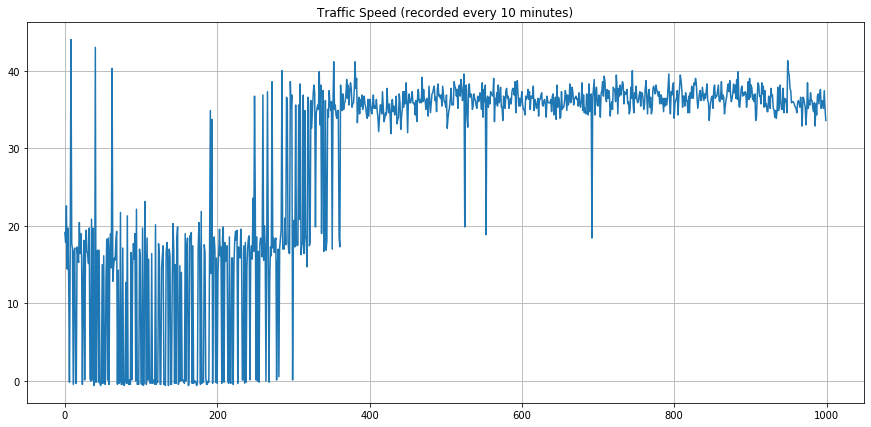

In [25]:
%matplotlib inline

plt.figure(figsize=(15, 7))
plt.plot(data.TrafficSpeed)
plt.title('Traffic Speed (recorded every 10 minutes)')
plt.grid(True)
plt.show()

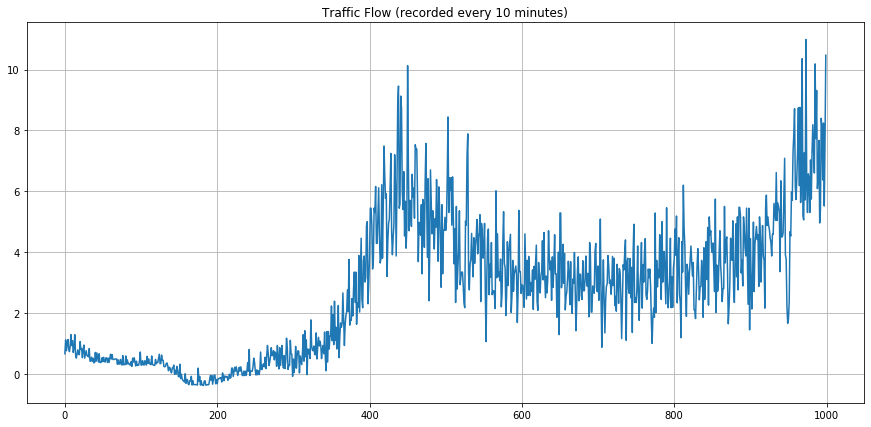

In [26]:
plt.figure(figsize=(15, 7))
plt.plot(data.TrafficFlow)
plt.title('Traffic Flow (recorded every 10 minutes)')
plt.grid(True)
plt.show()